In this notebook, we simulate the Poisson equation. This is an example of an $elliptic$ PDE.

We import the necessary libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Declaring the parameters and initializing our variables. We also define the boundary conditions:

In [2]:
#Parameters
nx = 50
ny = 50
nt = 100
xmin = 0
xmax = 2
ymin = 0
ymax = 1

dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)

#Initialization
p = np.zeros((ny,nx))
pd = np.zeros((ny,nx))
b = np.zeros((ny,nx))
x = np.linspace(xmin,xmax,nx)
y = np.linspace(ymin,ymax,ny)

#Source
b[int(ny/4),int(nx/4)] = 100
b[int(3*ny/4),int(3*nx/4)] = -100

We use the 2-D finite difference method here. Instead of using nested for-loops, we use NumPy arrays:

In [5]:
#Solving the PDE
for it in range(nt):

    pd = p.copy()

    p[1:-1,1:-1] = (((pd[1:-1, 2:] + pd[1:-1, :-2]) * dy**2 +
                    (pd[2:, 1:-1] + pd[:-2, 1:-1]) * dx**2 -
                    b[1:-1, 1:-1] * dx**2 * dy**2) / 
                    (2 * (dx**2 + dy**2)))

    p[0, :] = 0
    p[ny-1, :] = 0
    p[:, 0] = 0
    p[:, nx-1] = 0

In [8]:
from matplotlib import cm

We define a function to do the plotting. Use of a custom-made function helps avoid repetitive typing:

In [9]:
def plot2D(x,y,p):
    fig = plt.figure(figsize=(11,7),dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p[:],rstride=1,cstride=1,cmap=cm.viridis,linewidth=0,antialiased=False)
    ax.view_init(30,225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

Plotting the function:

C:\Users\rajat\AppData\Local\Temp\ipykernel_17824\949503533.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


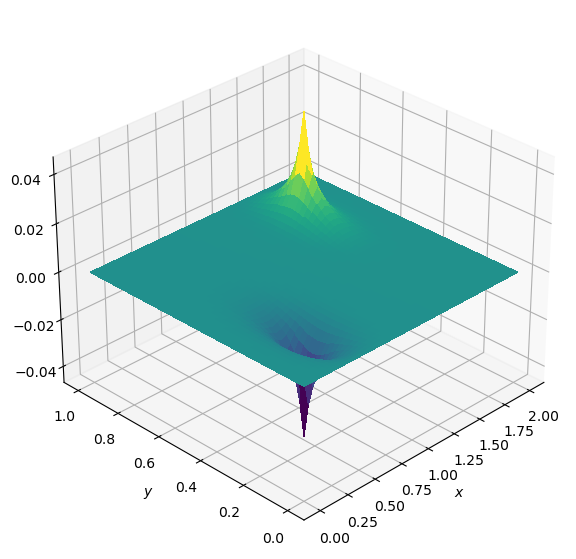

In [10]:
plot2D(x,y,p)